In [1]:
import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
#Import the dataset
cust = pd.read_csv("Mall_Customers.csv")

In [3]:
cust.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
print("There are {:,} observations and {} columns in the data set.".format(cust.shape[0], cust.shape[1]))
print("There are {} missing values in the data.".format(cust.isna().sum().sum()))
cust.head()

There are 200 observations and 5 columns in the data set.
There are 0 missing values in the data.


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [4]:
cust.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cust.shape

(200, 5)

There are 200 observations and 5 columns in the data set

In [6]:
cust.drop(["CustomerID"], axis = 1, inplace = True)

In [7]:
cust.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
cust.dtypes

Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [10]:
cust.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

There are 0 missing values in the data.

In [11]:
cust['Gender'] = ['Women' if i == 'Female' else 'Men' for i in cust.Gender]
pd.DataFrame(cust.select_dtypes('object').describe().T).style.set_caption("Summary Statistics of Categorical Variables")

,count,unique,top,freq
Gender,200,2,Women,112


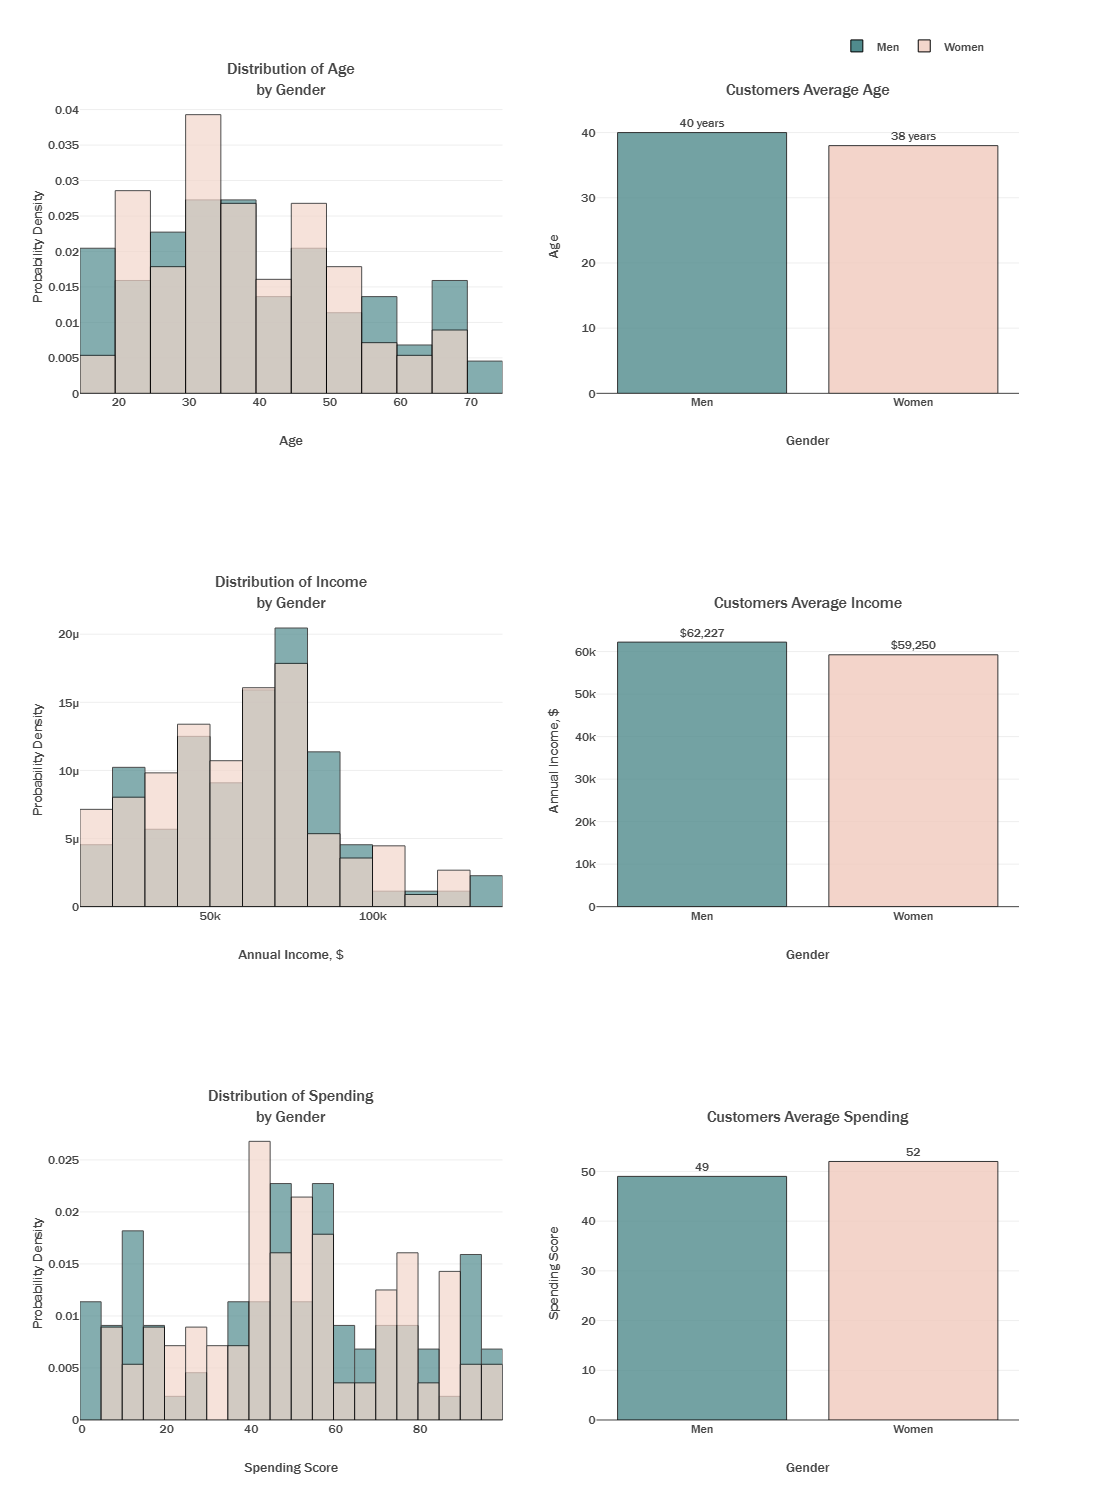

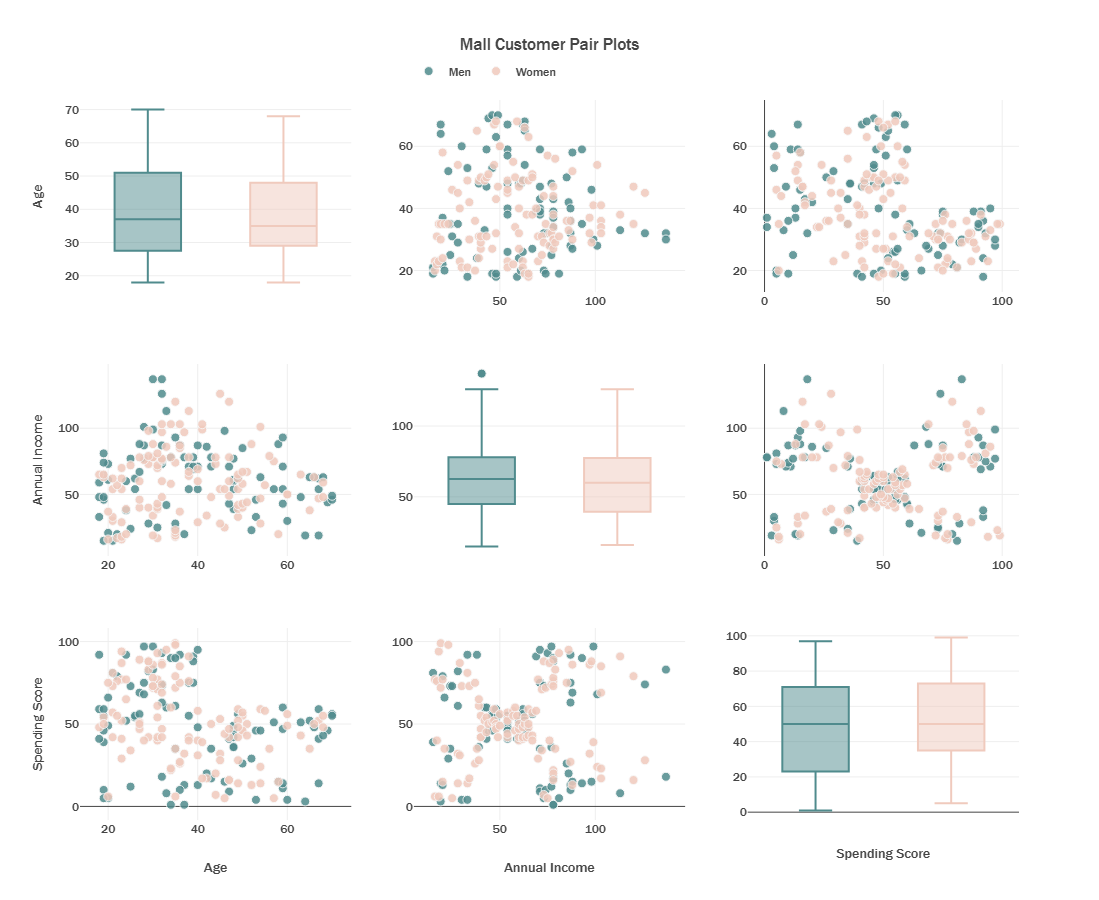

In [12]:
init_notebook_mode(connected=True)
plot_df=cust.copy()
plot_df['Annual Income']=plot_df['Annual Income'].mul(1000)
p1=plot_df.groupby('Gender')['Age'].mean().round(0).astype(int).reset_index()
p2=plot_df.groupby('Gender')['Annual Income'].mean().reset_index()
p3=plot_df.groupby('Gender')['Spending Score'].mean().round(0).astype(int).reset_index()

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Distribution of Age<br>by Gender", 
                                    "Customers Average Age",
                                    "Distribution of Income<br>by Gender", 
                                    "Customers Average Income",
                                    "Distribution of Spending<br>by Gender", 
                                    "Customers Average Spending")
                   )

fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Age'], histnorm='probability density', 
                           marker=dict(color='#508B8D',opacity=0.7, line=dict(width=1, color='#000000')), 
                           nbinsx=20, name="Men"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Age'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Women"),
              row=1, col=1)

fig.add_trace(go.Bar(x=p1['Gender'], y=p1['Age'], text=p1['Age'], texttemplate='%{text} years', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} years<extra></extra>', showlegend=False),
              row=1, col=2)

fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Annual Income'], histnorm='probability density', 
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Annual Income'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Bar(x=p2['Gender'], y=p2['Annual Income'], text=p2['Annual Income'], 
                     texttemplate='$%{text:,.0f}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Income Among %{x} = $%{y}<extra></extra>', showlegend=False),
              row=2, col=2)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Spending Score'], histnorm='probability density', 
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Spending Score'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Bar(x=p3['Gender'], y=p3['Spending Score'], text=p3['Spending Score'], 
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=3, col=2)
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(template=temp,barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="Age", yaxis1_title='Probability Density', 
                  xaxis2_title="Gender", yaxis2_title="Age", yaxis2_range=[0,45],
                  xaxis3_title="Annual Income, $", yaxis3_title='Probability Density', 
                  xaxis4_title="Gender", yaxis4_title="Annual Income, $", yaxis4_range=[0,69e3],
                  xaxis5_title="Spending Score", yaxis5_title='Probability Density', 
                  xaxis6_title="Gender", yaxis6_title="Spending Score", yaxis6_range=[0,59]
                 )
fig.show()

# Pairplots
fig = ff.create_scatterplotmatrix(cust, diag='box', index='Gender', colormap=['#508B8D', '#F0CABD']) 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Mall Customer Pair Plots", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=900, width=700)
fig.show()

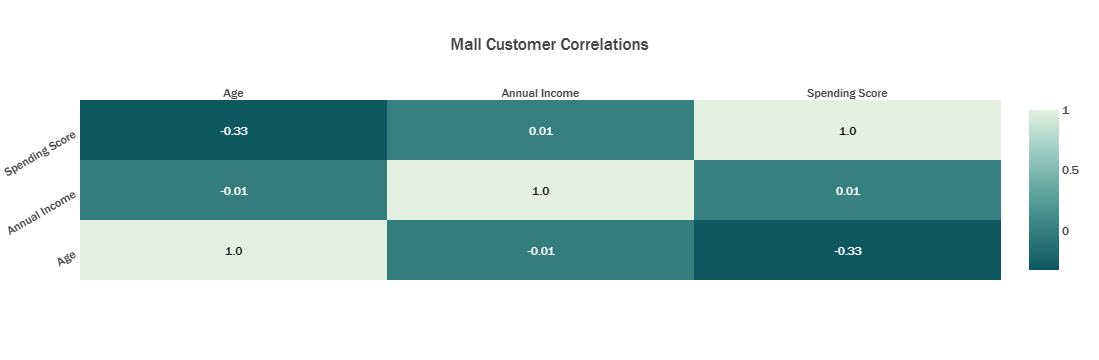

In [13]:
customer = cust.drop(["Gender"], axis=1)
# Correlations
corr = customer.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Mall Customer Correlations", yaxis_tickangle=-30)
fig.show()


In [14]:
cust.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

### Summary of EDA

Overall, the distributions are fairly proportional between men and women. On average, men are slightly older than women and tend to have higher incomes, while women tend to spend more than men. Based on the correlations and scatterplots, the variables in the data set do not have very strong relationships with each other. There is a weak negative association between Age and Spending Score of -0.33 and in the scatterplot above, we see that as customers get older, they tend to spend less than younger customers.

## K-Means Clustering

One clustering method I'll investigate is K-Means Clustering, known for its simplicity and effectiveness in segmenting data into distinct clusters. K-Means aims to minimize the variation within clusters by iteratively assigning data points to the nearest cluster center. To determine the optimal number of clusters (k), I'll experiment with various values of k and compute the inertia, or distortion score, for each model. Inertia quantifies cluster similarity by measuring the total distance between data points and their nearest cluster center. Lower distortion scores indicate clusters with more similar observations and tighter cohesion.

  File "C:\Users\ARTHUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ARTHUR\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARTHUR\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ARTHUR\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


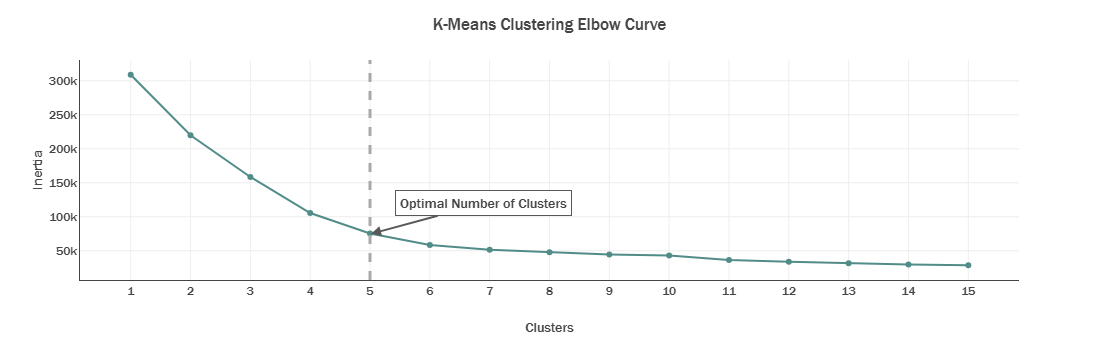

In [15]:
# K-Means Clustering
clust_df = cust.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

The plotted graph displays the inertia values across various K-Means models with clusters ranging from 1 to 15. Notably, the inflection point in the graph emerges around 5 clusters, signifying a plateau in inertia. This suggests that the optimal number of clusters, denoted as \( k \), is approximately 5. Following is a visual representation of the clusters categorized by their spending score and income.

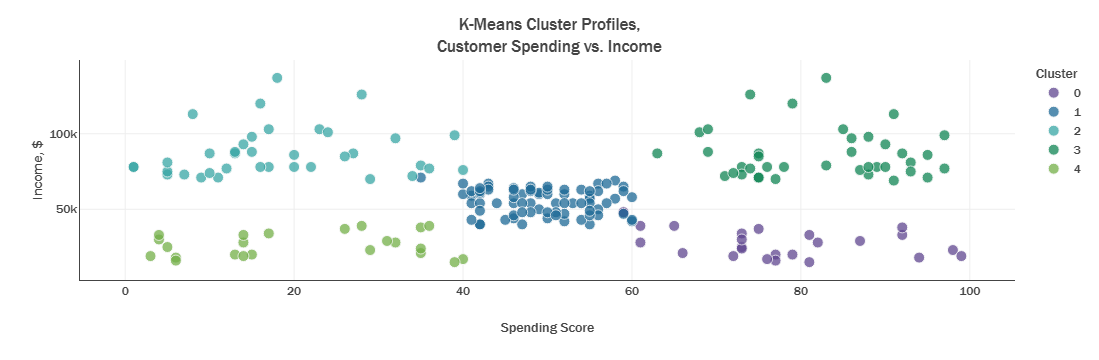

In [16]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(clust_df)
plot_km=clust_df.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Spending Score", y="Annual Income", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()

The K-Means model effectively partitions the dataset into distinct clusters based on customers' spending and income. In the plotted graph, Cluster 0, positioned at the center, comprises customers with average spending scores ranging from 35 to 61 and incomes between 40,000 and 71,000. On the left side of the graph, Clusters 1 and 3 identify customers with lower spending scores, below 40, and segregate them based on their income levels. Conversely, Clusters 2 and 4 represent customers with higher spending scores, exceeding 61, and further categorize them according to their income.

## Hierarchical Clustering

The subsequent clustering technique to be examined is hierarchical clustering, which employs an agglomerative approach. Hierarchical clustering initiates by treating each observation as an individual cluster and progressively merges groups of observations from the bottom up. It identifies pairs of observations with the greatest similarity, typically determined by Euclidean distance, and iteratively combines clusters based on these distances until all observations are consolidated into a single cluster.

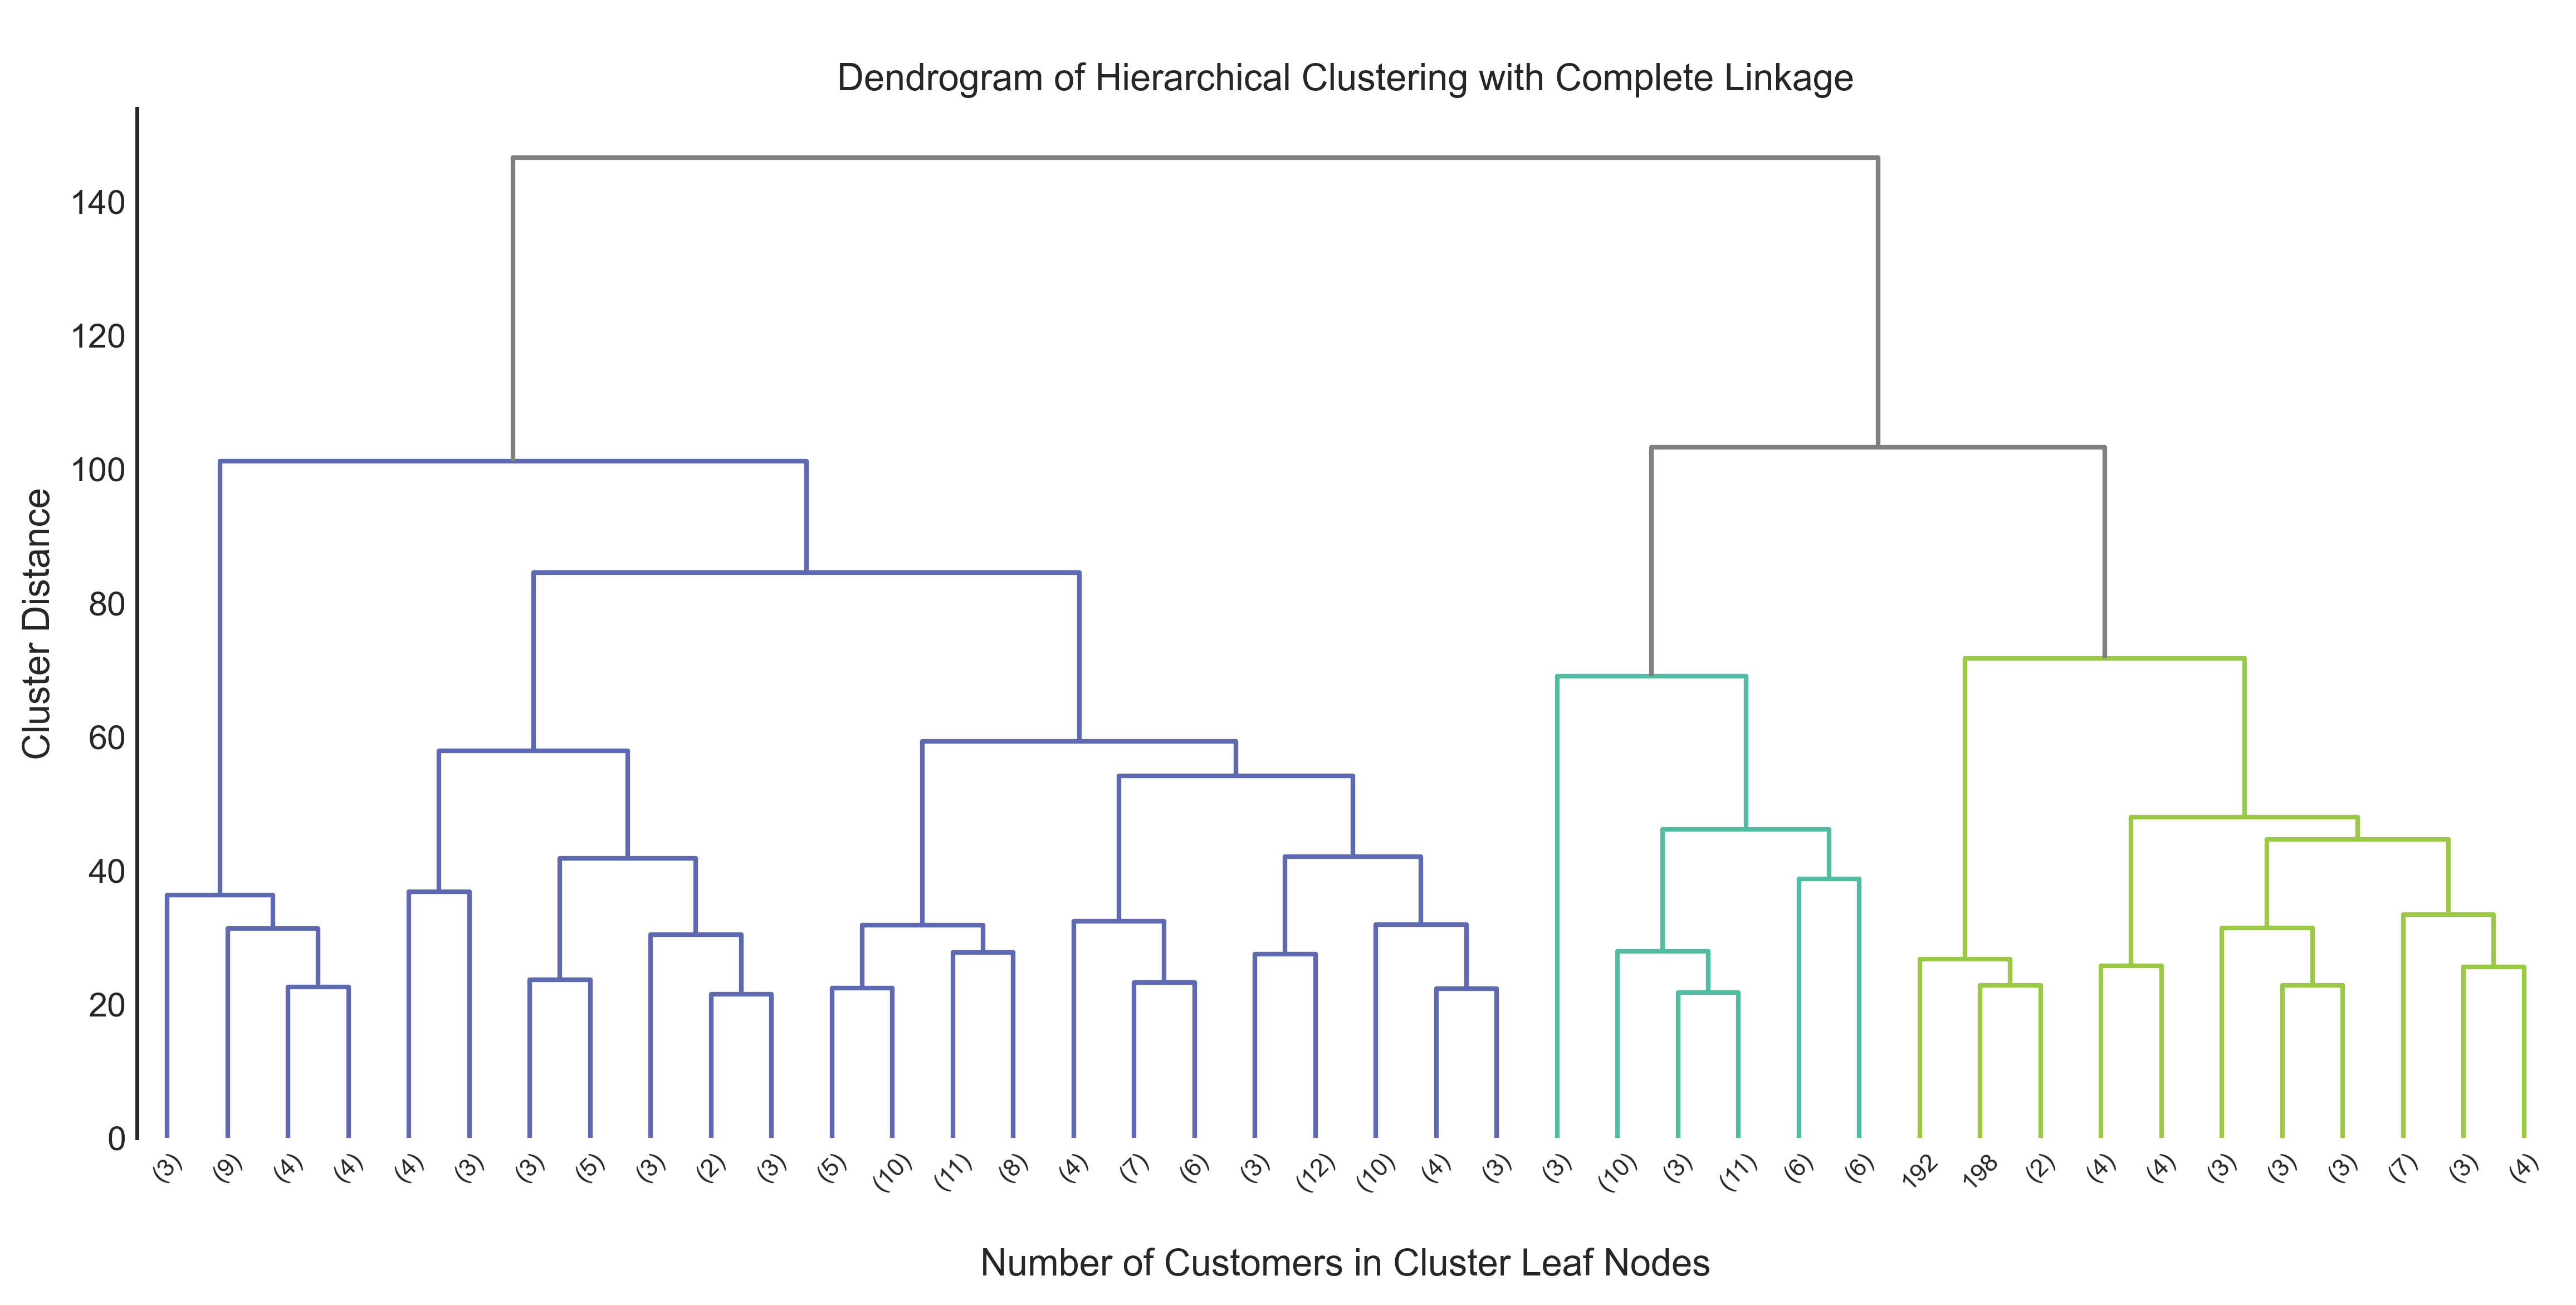

In [17]:
sns.set(rc={'figure.dpi':400})
sns.set_context('notebook')
sns.set_style('ticks')

Z = hierarchy.linkage(clust_df, method='complete', metric='euclidean')
fig, ax = plt.subplots(figsize=(14,6))
hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])
den = hierarchy.dendrogram(Z, orientation='top', color_threshold=102,
                           p=40, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='grey')
#ax.axhline(101, color='grey', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
ax.set_ylabel('Cluster Distance')
ax.set_title('\nDendrogram of Hierarchical Clustering with Complete Linkage')
fig.show()

The dendrogram depicted above illustrates hierarchical clusters generated using complete linkage. This method merges pairs of clusters with the smallest maximum distance between their constituent observations. The height of branch splits indicates the distance between clusters, with earlier splits indicating higher similarity. By making a horizontal cut across the dendrogram, we can determine the number of clusters. For instance, a cut at a height of 100 would yield approximately three clusters, with the majority of customers grouped in the first cluster, denoted by the color purple. Now, let's examine the results of hierarchical clustering based on customer spending and income.

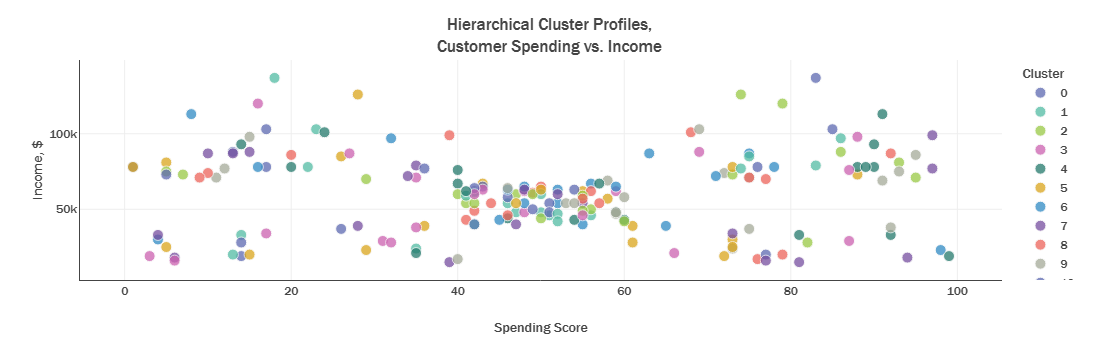

In [18]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=None, linkage='complete', compute_full_tree=True, distance_threshold=0)

# Fit and predict clusters
hc_pred = hc.fit_predict(clust_df)

plot_hc = clust_df.copy()
plot_hc["Hierarchical Cluster"] = hc_pred
plot_hc = plot_hc.sort_values(by='Hierarchical Cluster')
plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(str)

# Plot of clusters                                               
fig = px.scatter(plot_hc, x="Spending Score", y="Annual Income", color="Hierarchical Cluster",
                 color_discrete_sequence=px.colors.qualitative.Vivid[1:])
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="Hierarchical Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()

Hierarchical clustering tends to put more weight on customer's income in creating the clusters. The largest cluster, Cluster 0, consists of customers who have an annual income of around 70,000 or less and spending scores ranging from 3 to 99, while customers in Clusters 1 and 2 have incomes above 70,000 and are further subdivided into smaller segments based on their spending score.

## DBSCAN

The upcoming clustering approach to explore is Density-Based Spatial Clustering of Applications with Noise (DBSCAN). Unlike K-Means or hierarchical clustering, DBSCAN partitions the data according to observation density, distinguishing regions of high density from those of low density. This method is adept at identifying irregularly shaped clusters and pinpointing outliers within the dataset. However, it's crucial to note that DBSCAN's performance may fluctuate depending on the density variations across observations.

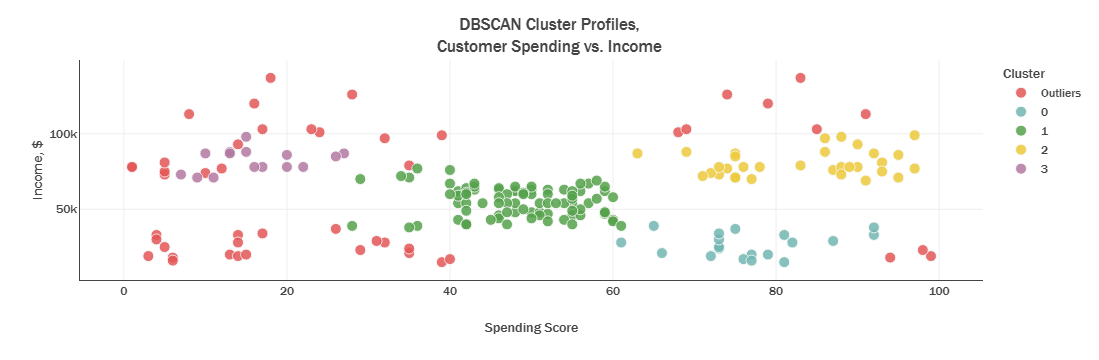

In [19]:
# DB Scan clustering
db=DBSCAN(eps=15, min_samples=11, metric='euclidean')  #17,15 14,7 12 7 115
db_preds=db.fit_predict(clust_df)
plot_db=clust_df.copy()
plot_db['DB Cluster'] = db_preds
plot_db=plot_db.sort_values(by='DB Cluster')
plot_db['DB Cluster'] = plot_db['DB Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)


# Plot of clusters   
fig = px.scatter(plot_db, x="Spending Score", y="Annual Income", color="DB Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="DBSCAN Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Spending Score',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()

The DBSCAN model with a local radius of 15 segments the data into four clusters. These segments resemble the clusters from the K-Means model, with the outliers identified in red. Overall, there are quite a few outliers in the graph, which is likely due to the variation in the densities of the clusters.

## Cluster Profile Comparison

Below are the plots of the customer profiles based on age, income, and spending from each clustering model.

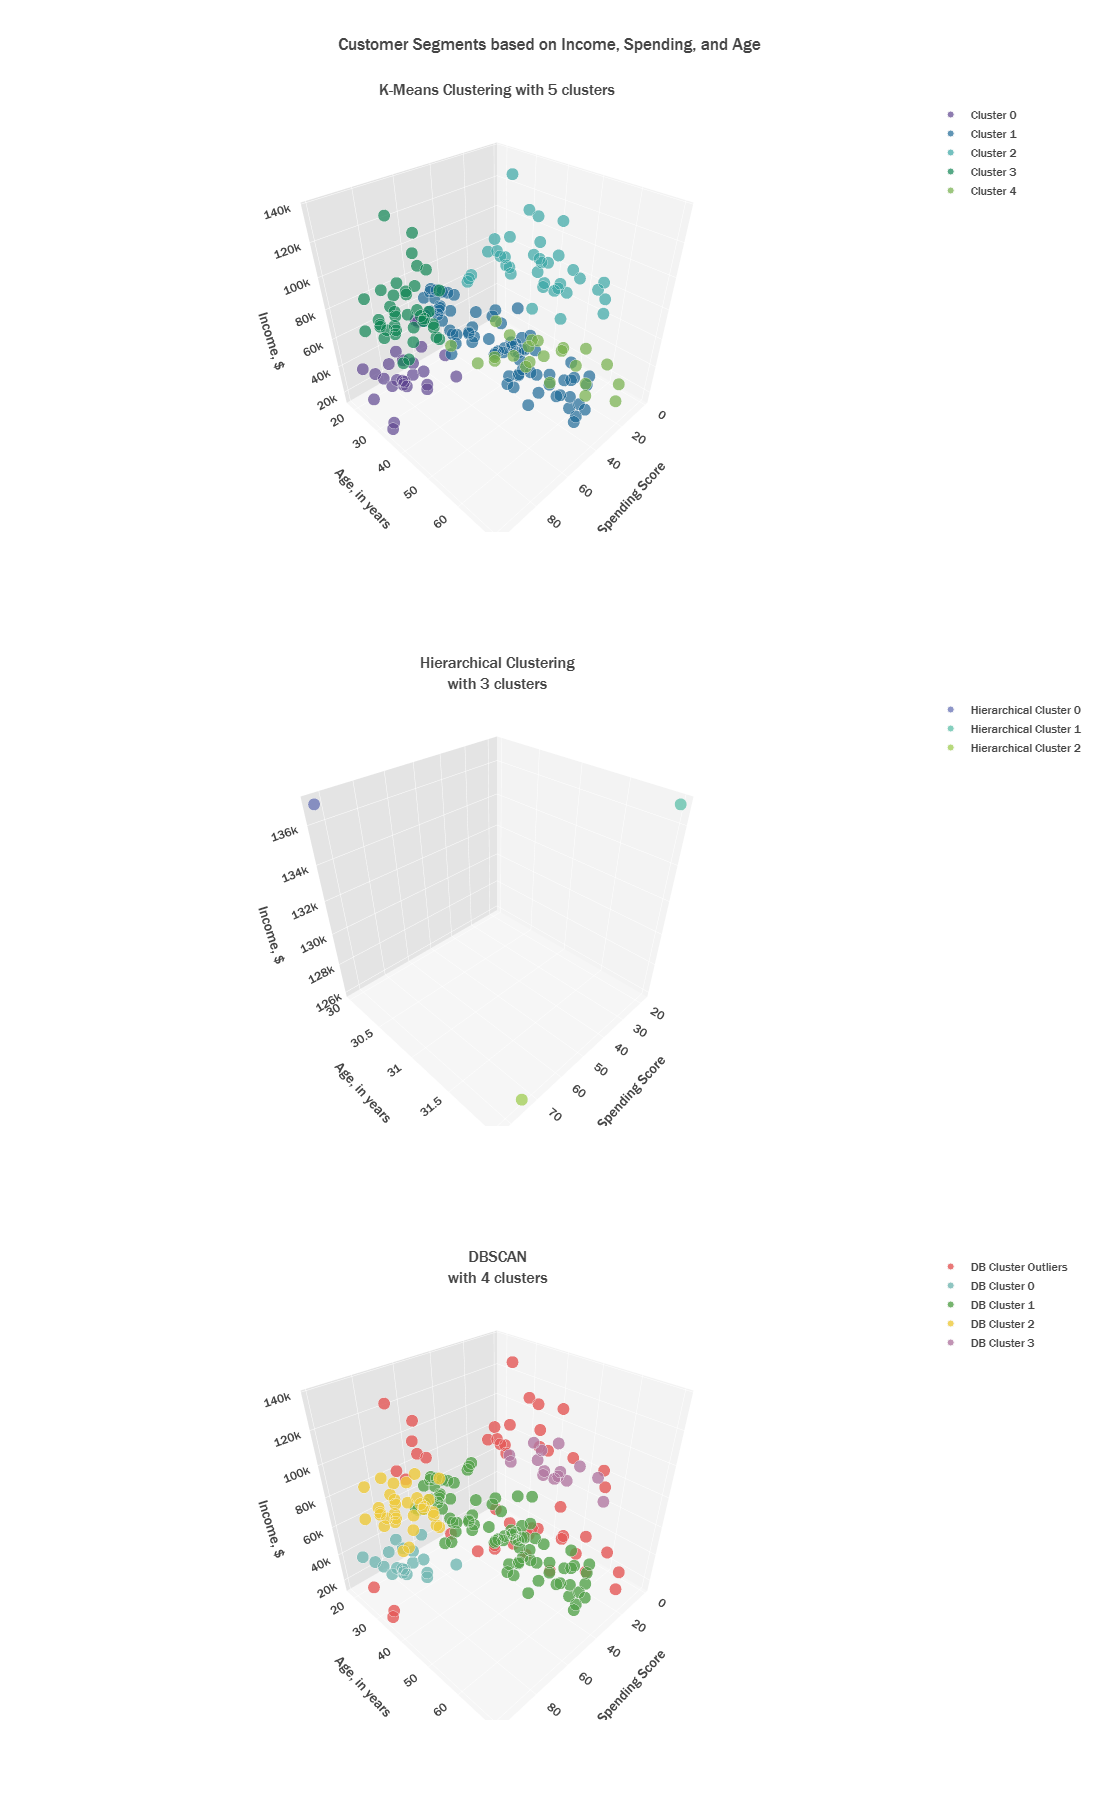

In [20]:
# Initializing figure with 3 3D subplots
fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.1,
                    specs=[[{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}], 
                           [{'type': 'scatter3d'}]],
                     subplot_titles=("K-Means Clustering with 5 clusters", 
                                     "Hierarchical Clustering<br>with 3 clusters", 
                                     "DBSCAN<br>with 4 clusters")
                   )

# Adding clusters to scatterplots 
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(int)
plot_km=plot_km.sort_values(by='K-Means Cluster')
for i in range(0,5):
    fig.add_trace(go.Scatter3d(x = plot_km[plot_km['K-Means Cluster'] == i]['Spending Score'],
                               y = plot_km[plot_km['K-Means Cluster'] == i]['Age'],
                               z = plot_km[plot_km['K-Means Cluster'] == i]['Annual Income'],                        
                               mode = 'markers', marker=dict(
                                   size=7,  
                                   color = px.colors.qualitative.Prism[i],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Cluster '+str(i)), legendgroup = 1),
                 row=1, col=1)

plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(int)
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
for i in range(0,3):    
    fig.add_trace(go.Scatter3d(x = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Spending Score'],
                               y = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Age'],
                               z = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Annual Income'],                        
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.Vivid[i+1],
                                   line_width = 1, 
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Hierarchical Cluster '+str(i)), legendgroup = 2), 
                  row=2, col=1)

for i, j in enumerate(plot_db['DB Cluster'].unique()): 
    fig.add_trace(go.Scatter3d(x = plot_db[plot_db['DB Cluster'] == j]['Spending Score'],
                               y = plot_db[plot_db['DB Cluster'] == j]['Age'],
                               z = plot_db[plot_db['DB Cluster'] == j]['Annual Income'], 
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.T10[i+2],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.8),
                               name = str('DB Cluster '+str(j)), legendgroup = 3), 
                  row=3, col=1)

fig.update_traces(hovertemplate='Customer Spending Score: %{x}<br>Income: $%{z}<br>Age: %{y}')
fig.update_layout(title="Customer Segments based on Income, Spending, and Age",
                  template=temp, height=1800, legend_tracegroupgap = 500,
                  scene=dict(aspectmode='cube',
                             xaxis = dict(title='Spending Score', 
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene2=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene3=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"))
                  )
fig.show()

## Conclusion

In this analysis, three clustering methodologies were employed to discern various customer profiles within a supermarket: K-Means Clustering, Hierarchical Clustering, and DBSCAN. Each model delineated unique customer segments that could be strategically targeted by the company based on their requirements. Notably, the K-Means model yielded the most distinguishable clusters, whereas DBSCAN produced a simplified model with four clusters and identified outliers within the dataset. Hierarchical Clustering, on the other hand, delineated the fewest clusters overall, with a greater emphasis on customer income.

Drawing insights from customer spending patterns, the company could leverage the K-Means model's two clusters to tailor their membership card program. Customers exhibiting higher spending scores above 60 are likely prime candidates for membership enrollment, especially considering their relatively young age group (under 40). Conversely, customers with lower spending scores could be engaged through targeted marketing campaigns featuring popular products and promotions.

To enhance understanding of customer preferences in the future, additional data on purchase frequency and product preferences could be incorporated. This enriched dataset would enable the company to further personalize product offerings tailored to each customer segment's preferences and behaviors.